<a href="https://colab.research.google.com/github/AranjeetaParihar/My_Data_Science_Project/blob/main/Multivariable_Regression_and_Valuation_Model_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

 Model that can provide a price estimate based on a home's(Boston Massachusetts in the 1970s) characteristics like:
* The number of rooms
* The distance to employment centres
* How rich or poor the area is
* How many students there are per teacher in local schools etc

Task:

1. Analyse and explore the Boston house price data
2. Split data for training and testing
3. Run a Multivariable Regression
4. Evaluate how model's coefficients and residuals
5. Use data transformation to improve model performance
6. Use model to estimate a property price

### Upgrade plotly (only Google Colab Notebook)

 Latest version of plotly. 

In [1]:
%pip install --upgrade plotly

     |████████████████████████████████| 26.5 MB 1.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


###  Import Statements


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data


In [4]:
data = pd.read_csv('boston.csv', index_col=0)

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y). 


# Preliminary Data Exploration 🔎


* Shape of `data`? 
* How many rows and columns does it have?
* What are the column names?


In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [6]:
data.shape

(506, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


## Data Cleaning - Check for Missing Values and Duplicates

In [8]:
data.isnull().values.any()

False

In [9]:
data.isnull().values.sum()

0

In [10]:
data.duplicated().any()

False

## Descriptive Statistics

In [11]:
# How many students are there per teacher on average?
data['PTRATIO'].mean()

18.455533596837967

In [12]:
# What is the average price of a home in the dataset?
data['PRICE'].mean()

22.532806324110698

In [14]:
# What are the minimum and the maximum value of the `CHAS` and why?
print(f"maximum:{data['CHAS'].max()}, minimum:{data['CHAS'].min()}")

maximum:1.0, minimum:0.0


In [16]:
# What is the maximum and the minimum number of rooms per dwelling in the dataset?
print(f"maximum:{data['RM'].max()}, minimum:{data['RM'].min()}")

maximum:8.78, minimum:3.5610000000000004


## Visualise the Features
 Having looked at some descriptive statistics, visualising the data for the model. Using [Seaborn's `.displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) to create a bar chart and superimpose the Kernel Density Estimate (KDE) for the following variables: 
* PRICE: The home price in thousands.
* RM: the average number of rooms per owner unit.
* DIS: the weighted distance to the 5 Boston employment centres i.e., the estimated length of the commute.
* RAD: the index of accessibility to highways. 


#### House Prices 💰

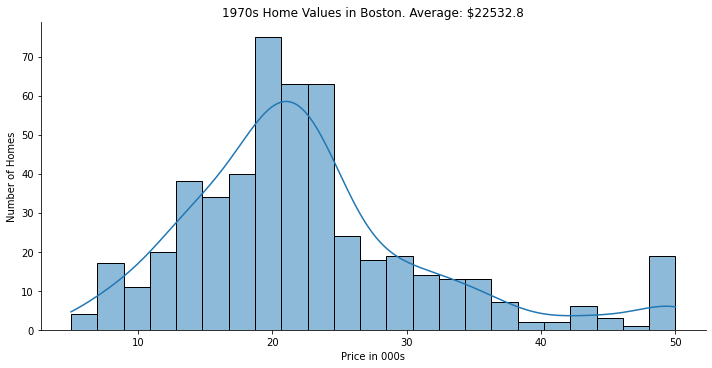

In [17]:
sns.displot(data['PRICE'], aspect=2, kde=True)
plt.title(f'1970s Home Values in Boston. Average: ${(1000*data.PRICE.mean()):.6}')
plt.xlabel('Price in 000s')
plt.ylabel('Number of Homes')
plt.show()

#### Distance to Employment - Length of Commute 🚗

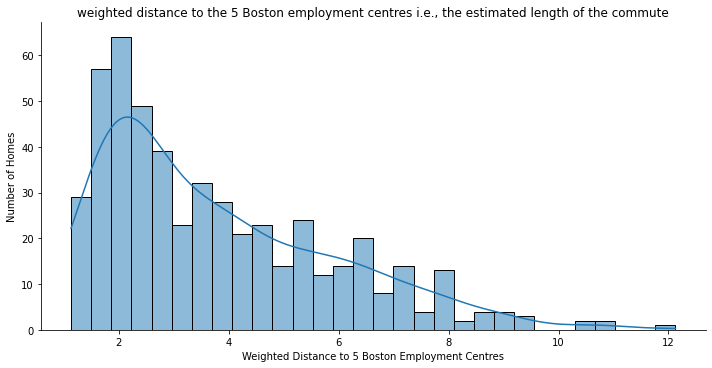

In [18]:
sns.displot(data['DIS'], bins=30, aspect=2, kde=True)
plt.title('weighted distance to the 5 Boston employment centres i.e., the estimated length of the commute')
plt.xlabel('Weighted Distance to 5 Boston Employment Centres')
plt.ylabel('Number of Homes')
plt.show()

#### Number of Rooms

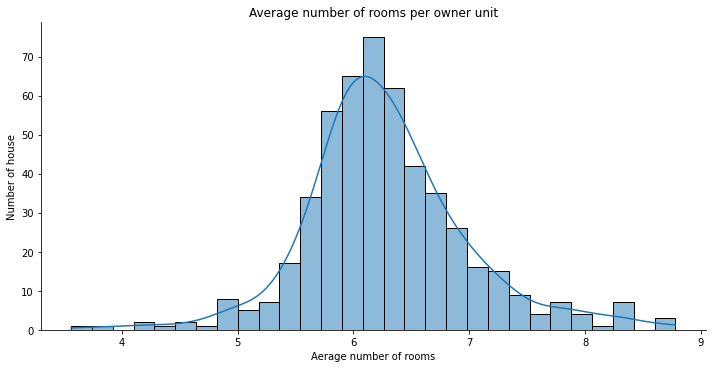

In [19]:
sns.displot(data['RM'], kde=True, aspect=2)
plt.title('Average number of rooms per owner unit')
plt.xlabel('Aerage number of rooms')
plt.ylabel('Number of house')
plt.show()

#### Access to Highways 🛣

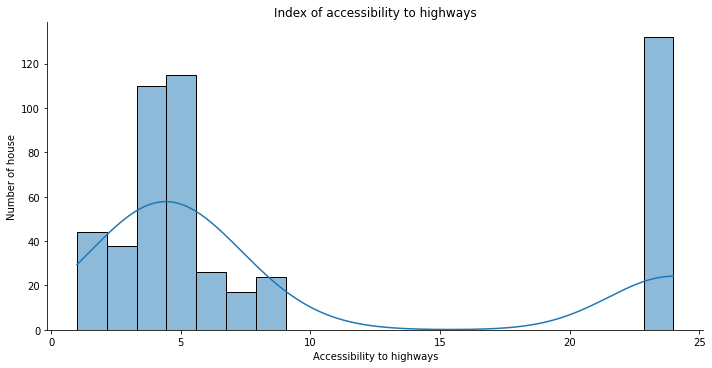

In [20]:
sns.displot(data['RAD'], kde=True, bins=20, aspect=2)
plt.title('Index of accessibility to highways')
plt.xlabel('Accessibility to highways')
plt.ylabel('Number of house')
plt.show()

#### Next to the River? ⛵️

Bar chart with plotly for CHAS to show many more homes are away from the river versus next to it. 


In [21]:
y_chas = data['CHAS'].value_counts()
fig = px.bar(x=['No','Yes'],  y=y_chas.values, title='Homes are Next to Charles River or not')
fig.update_layout(yaxis_title='Number of Homes')
fig.show()

# Understand the Relationships in the Data

### Run a Pair Plot


* What would you expect the relationship to be between pollution (NOX) and the distance to employment (DIS)? 
* What kind of relationship do you expect between the number of rooms (RM) and the home value (PRICE)?
* What about the amount of poverty in an area (LSTAT) and home prices? 


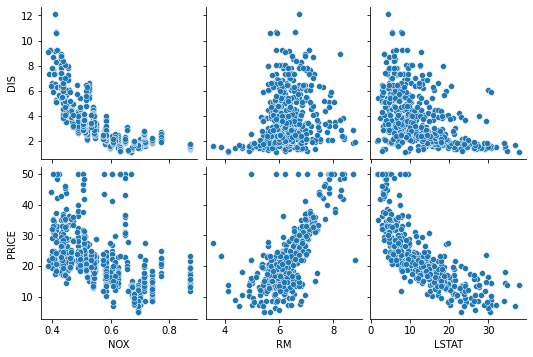

In [22]:
sns.pairplot(data, x_vars=['NOX','RM','LSTAT'], y_vars=['DIS','PRICE'])
plt.show()

#### Distance from Employment vs. Pollution

 Pollution goes down as distance from town increases.

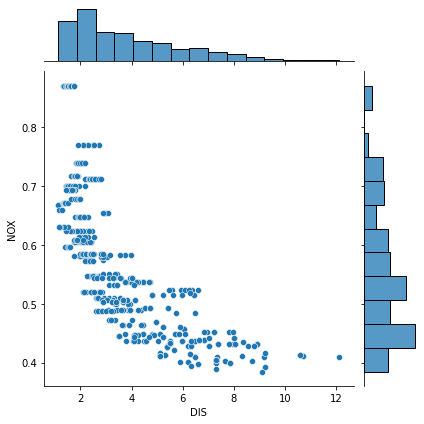

In [23]:
sns.jointplot(data=data, x='DIS', y='NOX')
plt.show()

#### Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution 

Compare INDUS (the proportion of non-retail industry i.e., factories) with NOX (Nitric Oxide Pollution) .
As the proportion of industry increases the NOX(pollution) also increases.

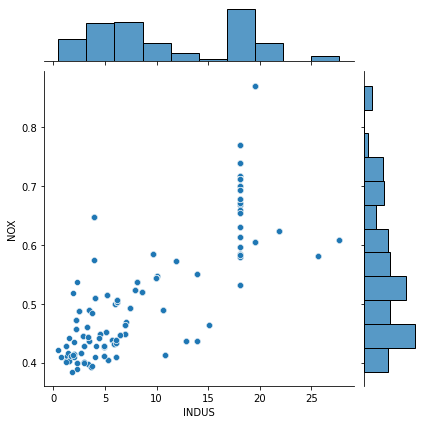

In [24]:
sns.jointplot(data=data, x='INDUS', y='NOX')
plt.show()

#### % of Lower Income Population vs Average Number of Rooms


Compare LSTAT (proportion of lower-income population) with RM (number of rooms) .

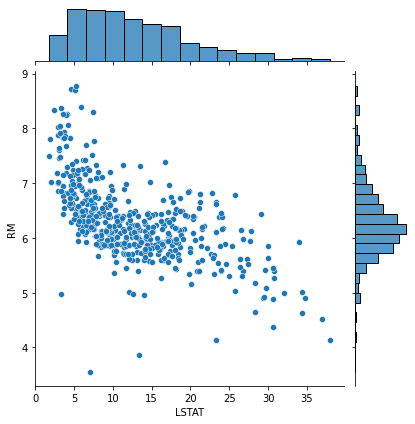

In [25]:
sns.jointplot(data=data, x='LSTAT', y='RM')
plt.show()

#### % of Lower Income Population versus Home Price

Compare LSTAT with PRICE . How does the proportion of the lower-income population in an area affect home prices? So they are inversely proportional.

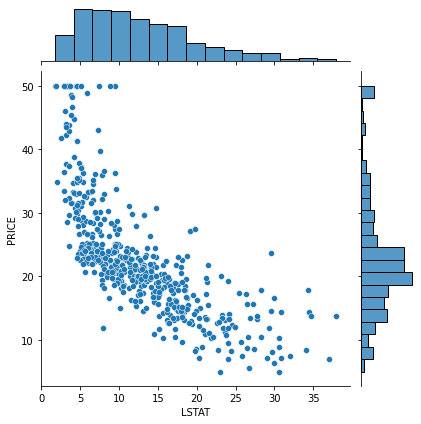

In [26]:
sns.jointplot(data=data, x='LSTAT', y='PRICE')
plt.show()

#### Number of Rooms versus Home Value
 
Compare RM (number of rooms) with PRICE.

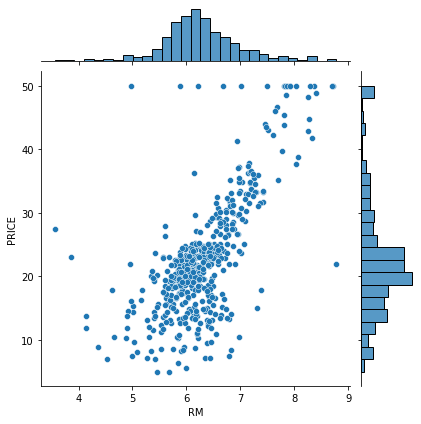

In [27]:
sns.jointplot(data=data, x='RM', y='PRICE')
plt.show()

# Split Training & Test Dataset
Splitting the data into train set and test set by 80/20.

In [28]:
X_train,X_test, y_train, y_test = train_test_split(data.iloc[:,:-1].values, data.iloc[:,-1].values, test_size=0.2, random_state=10)

# Multivariable Regression
 Linear Regression model will have the following form:

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

### Run First Regression

Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data?

In [29]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred = regressor.predict(X_train)

In [31]:
r_sqr = sklearn.metrics.r2_score(y_train, y_pred)
print("{:.2f}".format(r_sqr))

0.75


### Evaluate the Coefficients of the Model


In [33]:
coef = regressor.coef_
print(coef)

[-1.28180656e-01  6.31981786e-02 -7.57627602e-03  1.97451452e+00
 -1.62719890e+01  3.10845625e+00  1.62922153e-02 -1.48301360e+00
  3.03988206e-01 -1.20820710e-02 -8.20305699e-01  1.14189890e-02
 -5.81626431e-01]


### Analyse the Estimated Values & Regression Residuals

The next step is to evaluate regression. How good our regression is depends not only on the r-squared. It also depends on the **residuals** - the difference between the model's predictions ($\hat y_i$) and the true values ($y_i$) inside `y_train`. 

The first plot should be actual values (`y_train`) against the predicted value values: 

The cyan line in the middle shows `y_train` against `y_train`. If the predictions had been 100% accurate then all the dots would be on this line. The further away the dots are from the line, the worse the prediction was. That makes the distance to the cyan line, you guessed it, our residuals.

The second plot should be the residuals against the predicted prices.


In [34]:
predicted_values = regressor.predict(X_train)
residuals = (y_train - predicted_values)

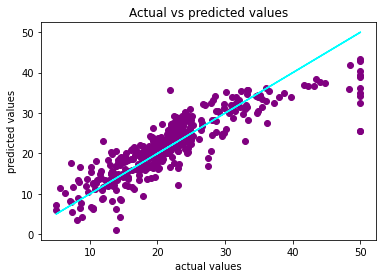

In [35]:
plt.scatter(x=y_train, y=predicted_values , color='purple')
plt.plot(y_train,y_train,color='cyan')
plt.title('Actual vs predicted values')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

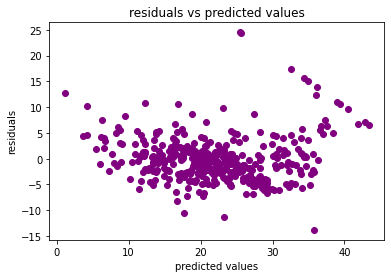

In [36]:
plt.scatter(x=predicted_values, y=residuals, color='purple')
plt.title('residuals vs predicted values')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.show()

Why do we want to look at the residuals? We want to check that they look random. Why? The residuals represent the errors of our model. If there's a pattern in our errors, then our model has a systematic bias.

We can analyse the distribution of the residuals. In particular, we're interested in the **skew** and the **mean**.

In an ideal case, what we want is something close to a normal distribution. A normal distribution has a skewness of 0 and a mean of 0. A skew of 0 means that the distribution is symmetrical - the bell curve is not lopsided or biased to one side. Here's what a normal distribution looks like: 

<img src=https://i.imgur.com/7QBqDtO.png height=400>

* Calculate the mean and the skewness of the residuals. 



In [37]:
resid_mean = round(residuals.mean())
print(f'residuals mean: {resid_mean}')

residuals mean: 0


In [38]:
df_residuals = pd.Series(data=residuals)
resid_skew = round(df_residuals.skew(), 2)
print(f'residuals skew: {resid_skew}')

residuals skew: 1.46


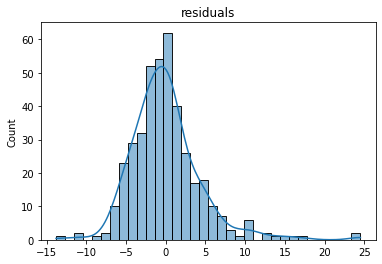

In [39]:
sns.histplot(residuals,kde=True)
plt.title('residuals')
plt.show()

### Data Transformations for a Better Fit

Investigate if the target `data['PRICE']` could be a suitable candidate for a log transformation. 

* Use Seaborn's `.displot()` to show a histogram and KDE of the price data. 
* Calculate the skew of that distribution.
* Use [NumPy's `log()` function](https://numpy.org/doc/stable/reference/generated/numpy.log.html) to create a Series that has the log prices
* Plot the log prices using Seaborn's `.displot()` and calculate the skew. 
* Which distribution has a skew that's closer to zero? 


In [40]:
price_skew = data['PRICE'].skew()
print(price_skew)

1.1080984082549072


In [42]:
log_prices = np.log(data['PRICE'])
log_prices_skew = log_prices.skew()
print(log_prices_skew)

-0.33032129530987864


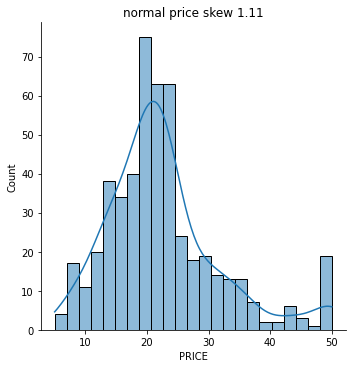

In [43]:
sns.displot(data['PRICE'],kde=True)
plt.title(f'normal price skew {price_skew:.3}')
plt.show()

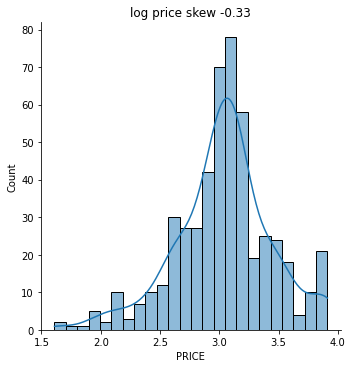

In [44]:
sns.displot(log_prices,kde=True)
plt.title(f'log price skew {log_prices_skew:.3}')
plt.show()

Log transformed data has skew close to zero so we use for our model.


### Plot the actual prices against the (transformed) log prices. 

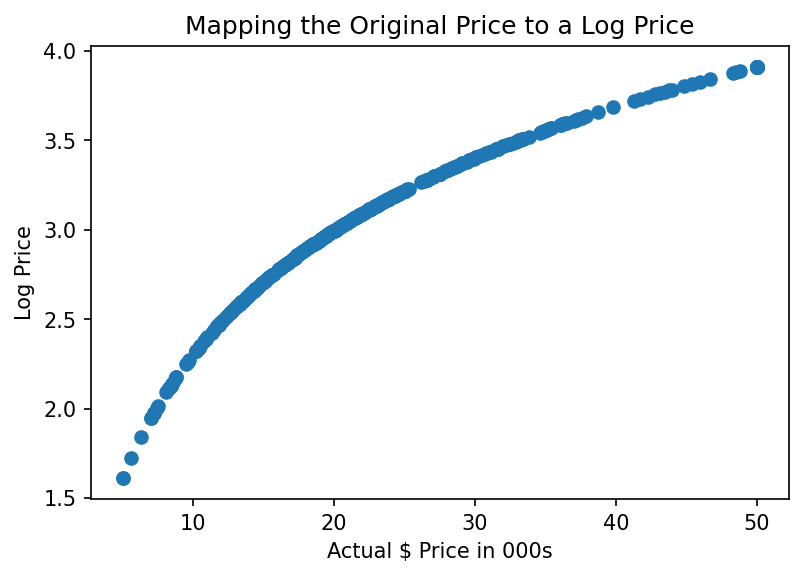

In [45]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, np.log(data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

* Use `train_test_split()` with the same random state as before to make the results comparable. 
* Run a second regression, but this time use the transformed target data. 
* What is the r-squared of the regression on the training data? 
* Have we improved the fit of our model compared to before based on this measure?


In [46]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(data.iloc[:,:-1].values, log_prices, test_size=0.2, random_state=10)

In [47]:
new_regressor = LinearRegression()

In [48]:
new_regressor.fit(new_X_train,new_y_train)

LinearRegression()

In [49]:
new_y_pred = new_regressor.predict(new_X_train)
new_r_sqr = sklearn.metrics.r2_score(new_y_train, new_y_pred)
print("{:.2f}".format(new_r_sqr))

0.79


We have r-square 0.79 which is more using transformed data compared to previous one which had r-squared of 0.75.

## Evaluating Coefficients with Log Prices


In [50]:
new_coef = new_regressor.coef_

In [51]:
df = pd.DataFrame({
    'price': coef,
    'log price': new_coef
},
 index=data.drop('PRICE',axis=1).columns)

In [52]:
print(df)

         price  log price
CRIM     -0.13      -0.01
ZN        0.06       0.00
INDUS    -0.01       0.00
CHAS      1.97       0.08
NOX     -16.27      -0.70
RM        3.11       0.07
AGE       0.02       0.00
DIS      -1.48      -0.05
RAD       0.30       0.01
TAX      -0.01      -0.00
PTRATIO  -0.82      -0.03
B         0.01       0.00
LSTAT    -0.58      -0.03


## Regression with Log Prices & Residual Plots


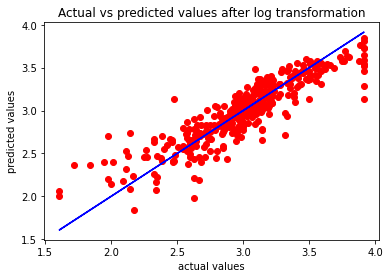

In [53]:
plt.scatter(x=new_y_train, y=new_y_pred , color='red')
plt.plot(new_y_train,new_y_train,color='blue')
plt.title('Actual vs predicted values after log transformation')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [54]:
new_residuals = (new_y_train - new_y_pred)
new_resid_mean = round(new_residuals.mean())
new_resid_skew = round(new_residuals.skew(),2)

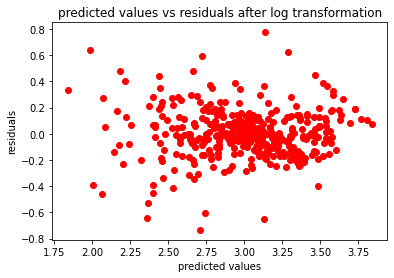

In [55]:
plt.scatter(x=new_y_pred,y=new_residuals,color='red')
plt.title('predicted values vs residuals after log transformation')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.show()


Calculate the mean and the skew for the residuals using log prices. Are the mean and skew closer to 0 for the regression using log prices?

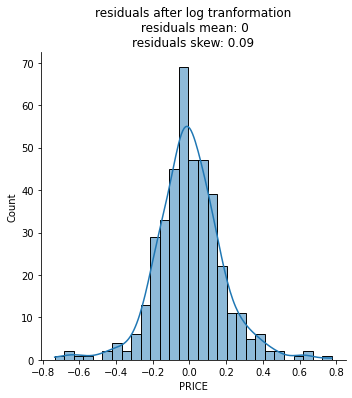

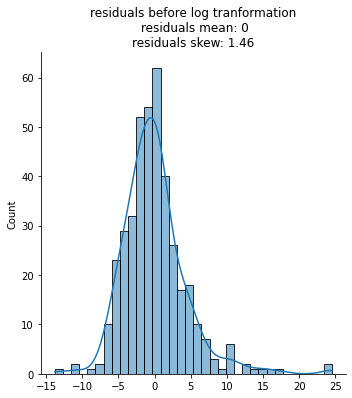

In [56]:
sns.displot(new_residuals,kde=True)
plt.title(f'residuals after log tranformation\n residuals mean: {new_resid_mean}\nresiduals skew: {new_resid_skew}')
plt.show()

sns.displot(residuals,kde=True)
plt.title(f'residuals before log tranformation\n residuals mean: {resid_mean}\nresiduals skew: {resid_skew}')
plt.show()

# Compare Out of Sample Performance

The *real* test is how our model performs on data that it has not "seen" yet. This is where our `X_test` comes in. 

**Challenge**

Compare the r-squared of the two models on the test dataset. Which model does better? Is the r-squared higher or lower than for the training dataset? Why?

In [57]:
y_pred_test = regressor.predict(X_test)
r_sqr_test = sklearn.metrics.r2_score(y_test, y_pred_test)
print("R-Squared of test set: {:.2f}".format(r_sqr_test))

R-Squared of test set: 0.67


In [58]:
new_y_pred_test = new_regressor.predict(new_X_test)
new_r_sqr_test = sklearn.metrics.r2_score(new_y_test, new_y_pred_test)
print("R-Squared of test set after log transformation: {:.2f}".format(new_r_sqr_test))

R-Squared of test set after log transformation: 0.74


# Predict a Property's Value using the Regression Coefficients

Our preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

The average property has the mean value for all its charactistics:

In [59]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65



Predict how much the average property is worth using the stats above. What is the log price estimate and what is the dollar estimate?  

In [60]:
log_price_estimate = new_regressor.predict(property_stats)[0]
print(f'log price estimate ${log_price_estimate:.3}')

log price estimate $3.03


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [61]:
price_estimate = np.exp(log_price_estimate)
print(f'price estimate ${price_estimate:.3}k')

price estimate $20.7k



Keeping the average values for CRIM, RAD, INDUS and others, value a property with the following characteristics:

In [62]:
# Define Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20 
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [63]:
# Solution:
property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town
property_stats['CHAS'] = 1
property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty

In [64]:
log_price_estimate = new_regressor.predict(property_stats)[0]
print(f'log price estimate: ${log_price_estimate:.3}')

log price estimate: $3.25


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [65]:
price_estimate = np.exp(log_price_estimate)
print(f'price estimate: ${price_estimate:.3}k')

price estimate: $25.8k
